In [5]:
import glob
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import os
import re

### Functions

In [6]:
_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

In [7]:
import math
from sklearn.preprocessing import MinMaxScaler



def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    return qx, qy

In [8]:
def getmaxbetween(x, y, xval1,xval2,ymin):
    xnew = []
    ynew = []
    for index, value in enumerate(x):
        if (value > xval1) & (value < xval2):
            if (y[index] < ymin):
                xnew.append(value)
                ynew.append(y[index])
    ymax = max(ynew)
    #xpos = y.index(ymax)
    return ymax

In [9]:
timestep = 1
z_pos = 1.0
import fileinput
#Function to edit
def getdf(filenames,timestep,z_pos):
    t = 0
    for file in filenames:
        if t == timestep:
            #print(file)
            dfname =  pd.read_csv(file, delim_whitespace=True)
            dfname.columns= ['x','y']
        t = t + 1
    return dfname


import statistics
#Get x,y and rotate from first
def getxy(yminus,filenames,timestep,z_pos): #minus takes values 1 if water, anything else (manual) if flow
    dfname = getdf(filenames,timestep,z_pos)
    dfname = dfname.sort_values(by=['x'])
    x1 = dfname["x"]
    y1 = dfname["y"] 
    #plt.scatter(x1,y1,s=0.01)
   
    transform = []
    origin = (0,0)
    rad = -15.35
    #x1 = [x - 1.338 for x in x1]
    for j in range(len(x1)):
        point = (x1[j], y1[j] )
        myplot = rotate(origin, point, math.radians(rad)) #prints x, y of rotaed point
        myplot = (myplot[0], myplot[1])
        transform.append(myplot) 
    #Then need to do the adjustment
    
    newdf = pd.DataFrame(transform,columns = ['x','y'])
    newdf = newdf.sort_values(by=['x'])
    newdf["y"] = newdf["y"] - newdf["y"].iloc[-1]
    #print(newdf["y"].iloc[-1])
    x = newdf["x"]
    y = newdf["y"]
    #Remove all values of x under a 1.338
    #remove all values of y under 0....
    return x, y, newdf

### Plots

In [17]:
myfolder = "18.5_0.1/b_0.005_5/" 
#myfolder = "b_0.001_12_long_air2/" 
water_filenames = sorted(glob.glob(myfolder + "/water_elevation*.txt"), key = natural_sort_key) 
#flow_filenames = sorted(glob.glob("/home/lbat537/nobackup/lily/three-phase/tilted_domain_final/bview_3d_mpi/flow*.csv"), key = natural_sort_key) 


NameError: name 'water_filenames' is not defined

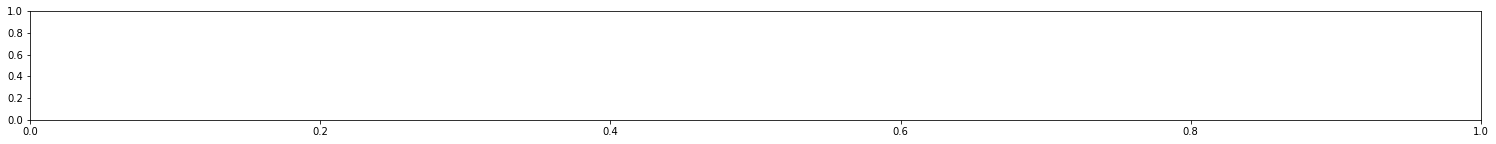

In [6]:
fig = plt.figure(figsize=(26, 2))
ax = fig.add_subplot(111)
#def getxy(xminus,yminus,filenames,timestep,z_pos):
x,y,newdf = getxy(1,water_filenames,220,2)
plt.scatter(x,y, s=0.01)
print(round(newdf.iloc[1000:],3))
#ymax = getmaxbetween(newdf['x'],y,2,3,0.149)
#xpos = y.index(ymax)
#xmax = x[xpos]
#plt.scatter(newdf["x"], y, s = 0.001)
plt.ylim(-0.265,0.265)
#print(x[xpos])
#plt.annotate('Maximum surface elevation = ' + str(round(ymax,3)) +'m at t = 1.2', xy=(xmax, ymax), xytext=(xmax , ymax - 0.3),
#            arrowprops=dict(facecolor='black', shrink=0.005))

## 

# 

In [10]:
#function which takes in df and distance and outputs array
def output_list(list2append,newdf,xcoord):
    print(xcoord)
    indexNames = newdf[ round(newdf["x"],3) != xcoord].index
    newdf = newdf.drop(indexNames , inplace=True)
    print(newdf)
    newdf = newdf.reset_index()
    newdf = newdf.query('y < 0.2')
    list2append = list2append.append([t,newdf.iloc[0]["y"]])
    return list2append

In [11]:

def get_all_elevations(Hi, visc, b):
    print("Hi")
    t = 0.004*3

    
    myplot300 = []
    myplot400 = []
    myplot500 = []
    myplot600 = []
    myplot700 = []
    myplot800 = []
    myplot900 = []
    myplot1000 = []

    
    myfolder = str(Hi)+'_'+str(visc)+'/b_'+str(b)+'_5'

    #myfolder = "b_0.001_12_long_air2/" 
    water_filenames = sorted(glob.glob(myfolder + "/water_elevation*.txt"), key = natural_sort_key) 
    print(myfolder)
    print(len(water_filenames))
    for ctr in range(3,1300,1):
        x,y,newdf = getxy(1,water_filenames,ctr,0)
        try:
            newdf = newdf.round({'x': 3, 'y': 4})

            newdf["xnew"]=newdf[["x"]]
            

            newdf300 = newdf.copy()
            newdf400 = newdf.copy()
            newdf500 = newdf.copy()
            newdf600 = newdf.copy()
            newdf700 = newdf.copy()
            newdf800 = newdf.copy()
            newdf900 = newdf.copy()
            newdf1000 = newdf.copy()


            indexNames300 = newdf[ round(newdf300['xnew'],3) != 4.343].index
            indexNames400 = newdf[ round(newdf400['xnew'],3) != 5.343].index
            indexNames500 = newdf[ round(newdf500['xnew'],3) != 6.343].index
            indexNames600 = newdf[ round(newdf600['xnew'],3) != 7.343].index
            indexNames700 = newdf[ round(newdf700['xnew'],3) != 8.343].index
            indexNames800 = newdf[ round(newdf800['xnew'],3) != 9.343].index
            indexNames900 = newdf[ round(newdf900['xnew'],3) != 10.343].index
            indexNames1000 = newdf[ round(newdf1000['xnew'],2) !=11.343].index
            

            newdf300.drop(indexNames300, inplace=True)
            newdf400.drop(indexNames400, inplace=True)
            newdf500.drop(indexNames500, inplace=True)
            newdf600.drop(indexNames600, inplace=True)
            newdf700.drop(indexNames700, inplace=True) 
            newdf800.drop(indexNames800, inplace=True) 
            newdf900.drop(indexNames900, inplace=True) 
            
            newdf300 = newdf300.reset_index()
            newdf300 = newdf300.query('y < 0.22')
            newdf400 = newdf400.reset_index()
            newdf400 = newdf400.query('y < 0.22')
            newdf500 = newdf500.reset_index()
            newdf500 = newdf500.query('y < 0.22')
            newdf600 = newdf600.reset_index()
            newdf600 = newdf600.query('y < 0.22')
            newdf700 = newdf700.reset_index()
            newdf700 = newdf700.query('y < 0.22')
            newdf800 = newdf800.reset_index()
            newdf800 = newdf800.query('y < 0.22')
            newdf900 = newdf900.reset_index()
            newdf900 = newdf900.query('y < 0.22')
            newdf1000 = newdf1000.reset_index()
            newdf1000 = newdf1000.query('y < 0.22')
            

            myplot300.append([t,newdf300.iloc[0]["y"]])
            myplot400.append([t,newdf400.iloc[0]["y"]])
            myplot500.append([t,newdf500.iloc[0]["y"]])
            myplot600.append([t,newdf600.iloc[0]["y"]])
            myplot700.append([t,newdf700.iloc[0]["y"]])
            myplot800.append([t,newdf800.iloc[0]["y"]])
            myplot900.append([t,newdf900.iloc[0]["y"]])
            myplot1000.append([t,newdf1000.iloc[0]["y"]])

            t = t + 0.004
        except:
            t = t + 0.004
            continue

    np.savetxt(myfolder+'/cwave_gauge_300cm.txt', myplot300, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_400cm.txt', myplot400, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_500cm.txt', myplot500, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_600cm.txt', myplot600, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_700cm.txt', myplot700, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_800cm.txt', myplot800, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_900cm.txt', myplot900, fmt='%1.3f')
    np.savetxt(myfolder+'/cwave_gauge_1000cm.txt', myplot1000, fmt='%1.3f')
    
    
        

In [ ]:

for Hi in [18.5,39.5]:
    for visc in [0.1,0.01]:
        for b in [0.0,0.001,0.005,0.01,0.02,0.04,0.08, 0.2]:
            try:
                get_all_elevations(Hi, visc, b)
            except:
                continue
    

Hi
18.5_0.1/b_0.0_5
0
Hi
18.5_0.1/b_0.001_5
0
Hi
18.5_0.1/b_0.005_5
2001
Hi
18.5_0.1/b_0.01_5
2001


In [127]:
print(myfolder)

39.5_0.1/b_0.02_11/


In [128]:
import plotly.graph_objects as go

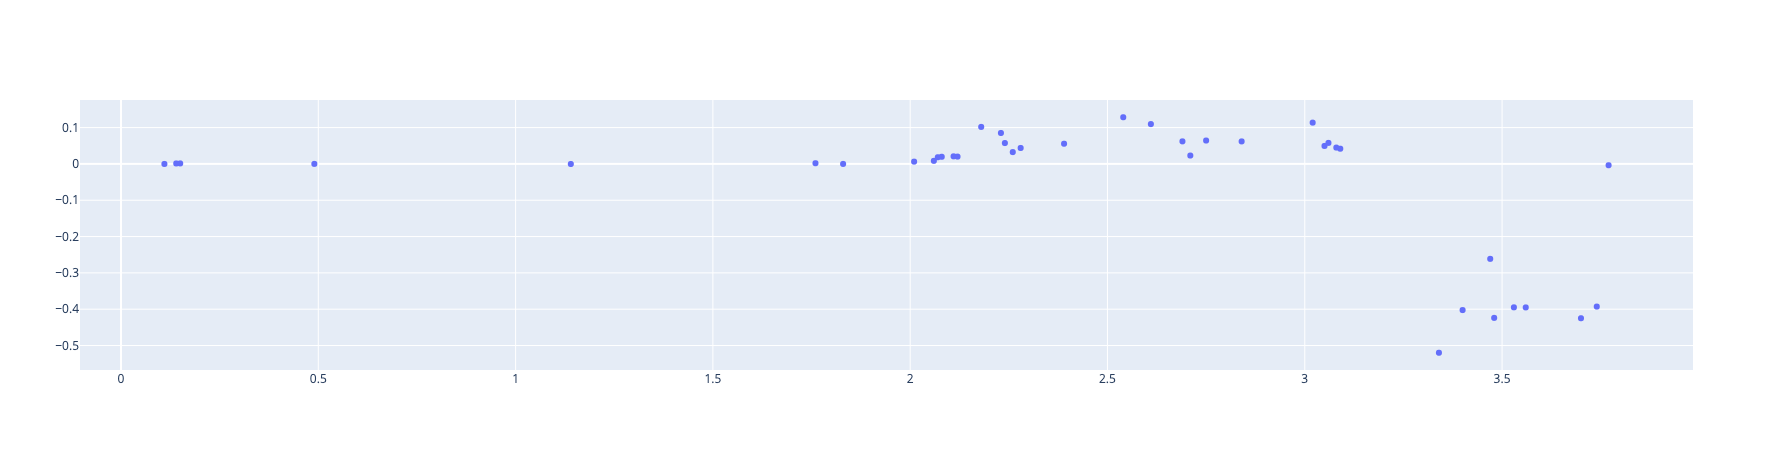

In [136]:
x, y = zip(*myplot28)
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.show()